In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.mixture import GaussianMixture

In [12]:
filename = 'zebra.jpg'

#Đọc ảnh
img_bgr = cv2.imread(filename)
if img_bgr is None:
    raise FileNotFoundError(f"Không tìm thấy file: {filename}")

#Chuyển sang RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
h, w, c = img_rgb.shape

#Flatten ảnh thành mảng 2D
img_flat = img_rgb.reshape((-1, 3))

In [13]:
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)

gmm.fit(img_flat)
labels = gmm.predict(img_flat)

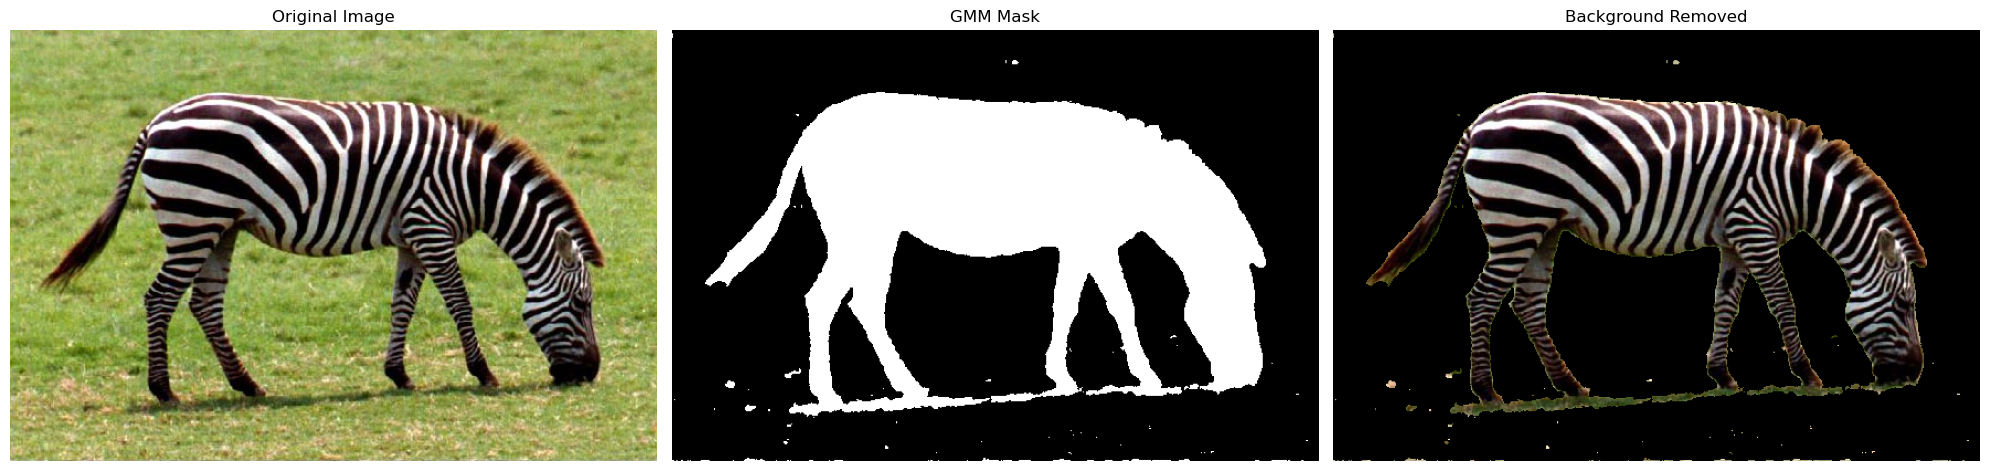

In [14]:
#Xác định nhãn nào là nền bằng việc chọn 4 góc của bức ảnh làm nền
corner_idxs = [0, w-1, (h-1)*w, h*w-1]
corner_labels = labels[corner_idxs]
bg_label = np.bincount(corner_labels).argmax()

#Tạo mask
mask = (labels != bg_label).reshape(h, w)

segmented_img = img_rgb * mask[:, :, np.newaxis]

#Trực quan hóa
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("GMM Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented_img.astype(np.uint8))
plt.title("Background Removed")
plt.axis('off')

plt.tight_layout()
plt.show()